<img src='http://drive.google.com/uc?export=view&id=1UAsSD6z0wK4UJjjzBhDEIlSZnELLmeeb'>

# <font color='lightblue'>Answering Questions</font>

In this project you will use all you learnt about in the class to answer a question. Imagine you are part of a team and you have been assigned a question to answer, build a notebook that you would be able to share with your team that shows what you found. 

In this project you will:

1.  Introduce your question of interest
2.  Make sure your reader knows enough about the data
3.  Wrangle and preprocess your data so that a team mate can reproduce your work
4.  Build and test a model that can provide insight into your question
5.  Interpret your model results
6.  Answer your question



Note: Marks will be awarded for clarity, organization, and succinctness. I.e., try to point out only the important parts in a well-organized easy to follow manner. (Marks: 3)

In [ ]:
#Loading in libraries I will be using for this project
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

**Action:** Importing my data into colaboratory.

In [ ]:
#loading in my chosen dataset
ti_titanic = pd.read_csv('/content/titanic_subset.csv')

## <font color='lightblue'>1. Ask a question </font>

**Q1**: Layout your question of interest. Remember to state your question as clearly and simply as you can (Mark 1), and what your ideal outcome would be (Marks 1).

**Answer:** My question is: Is there any correlation between class type, gender, and age betweeen passengers of the Titanic incident that survived or not? The ideal outcome would hopfully be to get a proper answer.


**Q2**: Identify and describe what data sources you'll use (Marks 1). Make sure to talk about one of the following: data accuracy, reliability, validity, or sample selection. (Marks: 1)

**Answer:** The Titanic dataset is a combination of a the Titanic competition dataset and additional passenger information retrieved from Wikipedia. (Name, Age, Class, Body, Boarded...etc.) In terms of data realibility, this information is a compilation of multiple sources condensed into Wiki, therefore, most of the information probably isn't fake. There's always a grain of salt you have to take whenever you're dealing with Wiki information however.

**Q3**: Layout what kind of ML problem you are facing and what kind of model you'll use to answer it (eg., is it unsupervised or supervised learning, and is it classification or regression). Make sure to say why. (Marks 1)

**Answer:** For the Titanic Survivor dataset I concluded that it is labeled data therefore I will be dealing with supervised learning. The type of model I will use for this dataset will be decision trees model. Also, since my question revolves around categorical data I consider this a classification problem.

## <font color='lightblue'>2. Data understanding, exploration, and visualization </font>

In [ ]:
#Presenting my dataset
ti_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1134,NaN,1,"Spedden, Mr. Frederic Oakley",male,45.0,1,1,16966,134.5000,...,C,269.0,"Spedden, Mr. Frederic Oakley",45.0,"Tuxedo Park, New York, US",Cherbourg,"Tuxedo Park, New York, US",3,NaN,1.0
1,962,NaN,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,...,Q,1048.0,"Mulvihill, Miss Bridget Elizabeth ""Bertha""",25.0,"Athlone, Westmeath, Ireland",Queenstown,"Providence, Rhode Island, US",15,NaN,3.0
2,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,...,S,940.0,"Kink, Miss Luise Gretchen",4.0,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin, US",2,NaN,3.0
3,769,0.0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,...,Q,1038.0,"Moran, Mr. Daniel James",27.0,"Askeaton, Limerick, Ireland",Queenstown,"Brooklyn, New York, US",NaN,NaN,3.0
4,1050,NaN,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,...,S,37.0,"Borebank, Mr. John James",42.0,"London, England, UK",Southampton,"Toronto, Ontario, Canada",NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,...,C,122.0,"Frauenthal, Mr. Isaac Gerald",43.0,"London, England, UK",Southampton,"New York, New York, US",5,NaN,1.0
1043,875,1.0,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,...,C,328.0,"Abelson, Mrs. Anna (née Wizosky?)",28.0,Russia,Cherbourg,"New York, New York, US",10,NaN,2.0
1044,103,0.0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,...,S,309.0,"White, Mr. Richard Frasar",21.0,"Brunswick, Maine, US",Southampton,"Brunswick, Maine, US",NaN,169MB,1.0
1045,582,1.0,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,...,C,297.0,"Thayer, Mrs. Marian Longsteth (née Morris)",39.0,"Haverford, Pennsylvania, US",Cherbourg,"Haverford, Pennsylvania, US",4,NaN,1.0


In [ ]:
#checking for the types of data
ti_titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
dtype: object

In [ ]:
#checking for any missing data
ti_titanic.isna().sum()

PassengerId      0
Survived       337
Pclass           0
Name             0
Sex              0
Age            204
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          808
Embarked         1
WikiId           3
Name_wiki        3
Age_wiki         5
Hometown         3
Boarded          3
Destination      3
Lifeboat       646
Body           937
Class            3
dtype: int64

By the looks of it, there are NaN data in a lot of columns. However, what is most important for my anaylsis is the number of people that survived or didn't survive, having NaN data values will result in a inaccurate data representation. Therefore, I will be removing any data entries for people that have NaN values in the survived column. After that, I will look again for the amount of NaN values overlaped, and see if it is necessary to remove the NaN values for age column. I'm doing this because I plan on checking if there is a correlation between the age and those that survived.

In [ ]:
#I am dropping any rows with NaN values in the survived column
ti_titanic_survived_na = ti_titanic[ti_titanic['Survived'].isna()==False]

#After that I will check the results of the act of removing any NaN values from survived column
ti_titanic_survived_na.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          548
Embarked         1
WikiId           1
Name_wiki        1
Age_wiki         3
Hometown         1
Boarded          1
Destination      1
Lifeboat       429
Body           637
Class            1
dtype: int64

In [ ]:
#Now, I am dropping any rows with NaN values in the age column
ti_titanic_controlled = ti_titanic_survived_na[ti_titanic_survived_na['Age'].isna()==False]

#After that I will check the results of the act of removing any NaN values from survived column
ti_titanic_controlled.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          424
Embarked         1
WikiId           0
Name_wiki        0
Age_wiki         0
Hometown         0
Boarded          0
Destination      0
Lifeboat       334
Body           501
Class            0
dtype: int64

With all of these NaN values removed we can get a more accurate answer when we start using a model. The rest of the missing information like Cabin, Lifeboat, and Body are considered factors that do not affect the survivability of a passenger.

**Action**: While above you gave an overview of the dataset(s) that will be used, here make sure that the reader understands the important details of the data. E.g., show a figure or descriptive statistic and explain why the reader should know about this, i.e., how will it help your reader understand your analysis? (Marks: 2)

In terms of being able to retrieve descriptive statistics we can look at a few numeric values, like Age.

In [ ]:
#This is a general overview of the entire dataset
ti_titanic_controlled.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,570.00,570.00,570.00,570.00,570.00,570.00,570.00,570.00,570.00,570.00
mean,446.96,0.41,2.23,30.10,0.46,0.41,34.97,612.48,30.03,2.22
std,258.46,0.49,0.84,14.36,0.85,0.82,55.18,368.58,14.15,0.84
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00,1.00,0.42,1.00
25%,222.25,0.00,1.00,21.00,0.00,0.00,8.05,308.25,21.00,1.00
50%,449.00,0.00,2.00,29.00,0.00,0.00,14.75,596.50,29.00,2.00
75%,673.75,1.00,3.00,38.00,1.00,1.00,32.09,894.00,38.00,3.00
max,891.00,1.00,3.00,80.00,5.00,6.00,512.33,1314.00,74.00,3.00


In [ ]:
#The results presented here are the summary statistics of the Passenger Age

#get the mean of age
age_mean = ti_titanic_controlled['Age'].mean()

#get the mode of age
age_mode = ti_titanic_controlled['Age'].mode()[0]

#get the median of age
age_median = ti_titanic_controlled['Age'].median()

#get the variance of age
age_variance = ti_titanic_controlled['Age'].std()

# now we will print the calculated results
print("the mean age is: ", age_mean.round(2))
print("the most common age is: ", age_mode)
print("the middle most age is: ", age_median)
print("the standard deviation of age is: ", age_variance.round(2))

the mean age is:  30.1
the most common age is:  24.0
the middle most age is:  29.0
the standard deviation of age is:  14.36


Given the information we have now, it's best to visualize these information so we can start painting a picture with the numeric values.

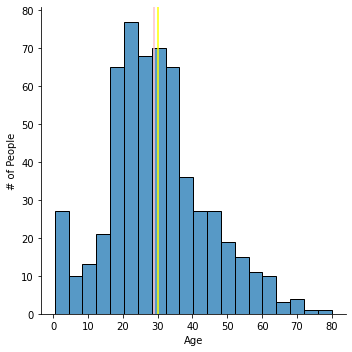

In [ ]:
#This graph shows the different ages of people on the ship with the mean, and median of age
sns.displot(data=ti_titanic_controlled, x = 'Age').set( ylabel='# of People')
plt.axvline(age_mean,color="yellow")
plt.axvline(age_median,color="pink")

With this graph, I want to show the amount of people in different age groups that were on the ship. I also included extra statistics like mean and median to emphasize this point. As you can tell, people around 20 - 35 were the highest groups.

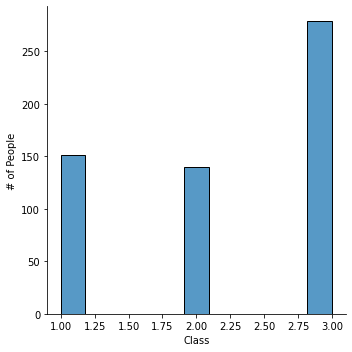

In [ ]:
#This graph shows the amount of people in different classes
sns.displot(data=ti_titanic_controlled, x = 'Class').set( ylabel='# of People')

With this graph, I want to show the amount of people in different classes that were on the ship. As you can tell, class 3 makes up the most passengers on board.

[Text(0.5, 0, 'Types of Class Tickets')]

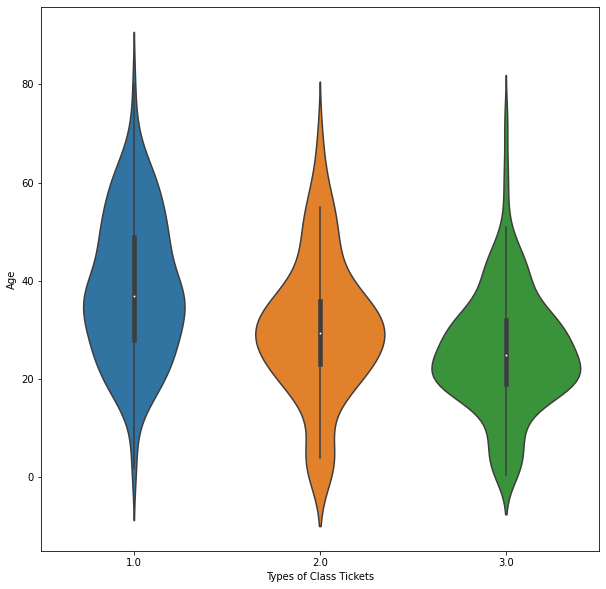

In [ ]:
#This violin graph shows the types of age groups that buy different class seats
sns.violinplot(data=ti_titanic_controlled, x= "Class", y="Age").set( xlabel='Types of Class Tickets')

With this graph, I want to show how the passenger's age relates to the class ticket they purchased. We can clearly see that the younger the passenger the more likely they are to have Class 3 tickets. When we compare this to older passengers, we can see that they are more likely to have Class 1 and 2 tickets.

[Text(0, 0.5, 'Types of Class Tickets'),
 Text(0.5, 0, 'Passengers That Survived')]

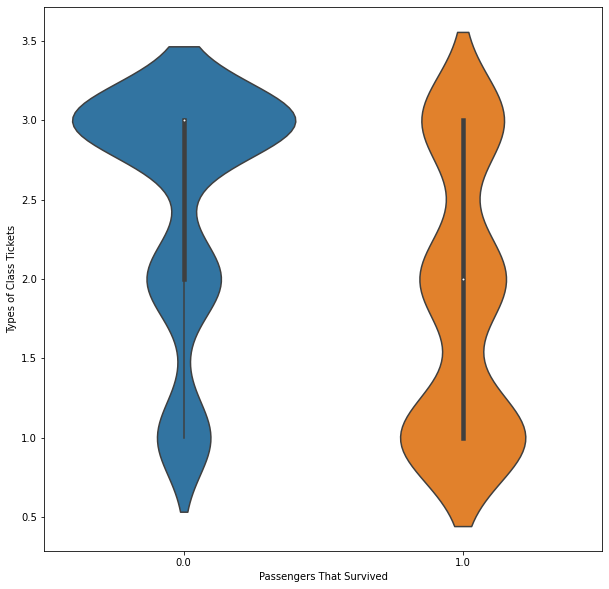

In [ ]:
#This graph shows the people that died or survived the titanic depending on their class
sns.violinplot(data=ti_titanic_controlled, x= "Survived", y="Class").set( xlabel='Passengers That Survived', ylabel='Types of Class Tickets')

With this graph I want to show how there is a relation between class tickets and passengers that survived. We can clearly see that the more expensive the class ticket, the more likely you are to survive. And vice versa, the cheaper the class ticket, the more likely you are to not survive. Unfortunately, majority of the people that did not survive were in Class 3.

[Text(0.5, 0, 'Types of Class Tickets')]

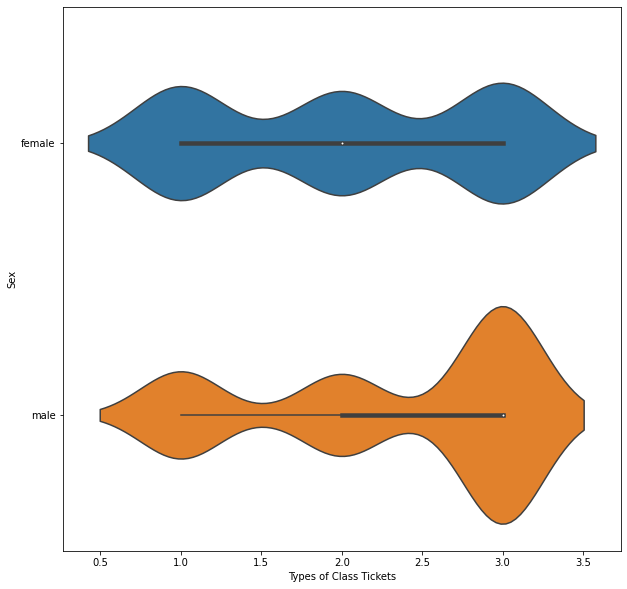

In [ ]:
#This Violin plot shows the gender in each class
sns.violinplot(data=ti_titanic_controlled, x= "Class", y="Sex").set(xlabel='Types of Class Tickets')

With this graph, I want to show how there is a stark difference between male passengers and female passengers. As you can see, male passengers are more likely to be in 3rd class, than female passengers. An interesting piece of information to takeaway from the graph is that female passengers tend to be evenly distributed among the different classes.

[Text(0, 0.5, 'Passengers That Survived')]

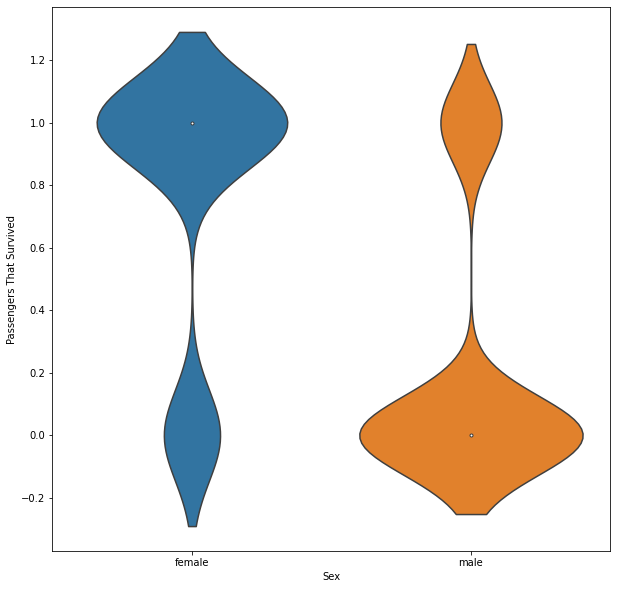

In [ ]:
#This is a violin plot to compare the gender of the survivors and those who survived and didn't
sns.violinplot(data=ti_titanic_controlled, x='Sex', y='Survived').set( ylabel='Passengers That Survived')

With this graph, I want to show that there is a huge difference in male passenger survivors vs. female passenger survivors. As you can see majority of survivors are females passengers, and majority of those that died are male passengers.

**Answer:** With the multiple graphs presented I want to show the reader how important other variables are when it comes to building a model that can determine if a passenger survived or not. I first showed summary statistics for age and than graphed it out to show the overall view of age on a bargraph. I did this to help the reader visualize how many people were in each age group. The next thing I did was make multiple violin graphs to show the relation between age, gender, class, types of classes, and passengers that survived. By doing this, I can start painting a small story behind which passengers survived versus which didn't. From what you can gather so far, it is easy to tell that passengers in class 3 that were males are least likely to survive versus females in any class. All of these additional information will be helpful for the reader to understand the process going along to determining what factors contribute to a passenger surviving or not.

## <font color='lightblue'>3. Data wrangling and preprocessing </font>

**Action**: Layout all your data wrangling and preprocessing steps so that a reader will understand why you took each step, and would be able to reproduce your steps. (Marks: 3)

For Data Wrangling I have already done those steps and, I have also included my explanation for each step in section 2.



In [ ]:
#Converting Sex values into categories
ti_titanic_controlled['Sex'] = ti_titanic_controlled.Sex.astype('category')

In [ ]:
#grabbing categorical variables we want to convert
cat_names = ['Sex']

#create dummy variables (one-hot encoding)
df_cat = pd.get_dummies(ti_titanic_controlled[cat_names])

#adding the dummy variables back to the original dataframe
ti_titanic_controlled = pd.concat([ti_titanic_controlled,df_cat], axis=1)

#now I am removing the original column before it was converted to hide duplication of data
ti_titanic_controlled = ti_titanic_controlled.drop(cat_names, axis=1)

#presenting new dataset
ti_titanic_controlled

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Sex_female,Sex_male
2,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",4.0,0,2,315153,22.0250,NaN,...,"Kink, Miss Luise Gretchen",4.0,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin, US",2,NaN,3.0,1,0
5,118,0.0,2,"Turpin, Mr. William John Robert",29.0,1,0,11668,21.0000,NaN,...,"Turpin, Mr. William John Robert",29.0,"Plymouth, Devon, England",Southampton,"Salt Lake City, Utah, US",NaN,NaN,2.0,0,1
7,662,0.0,3,"Badt, Mr. Mohamed",40.0,0,0,2623,7.2250,NaN,...,"Badt, Mr. Mohamed",40.0,"Tripoli, Lebanon",Cherbourg,New York City,NaN,NaN,3.0,0,1
8,413,1.0,1,"Minahan, Miss. Daisy E",33.0,1,0,19928,90.0000,C78,...,"Minahan, Miss Daisy E.",33.0,"Fond du Lac, Wisconsin, US",Southampton,"Fond du Lac, Wisconsin, US",14,NaN,1.0,1,0
9,130,0.0,3,"Ekstrom, Mr. Johan",45.0,0,0,347061,6.9750,NaN,...,"Ekström, Mr. Johan",45.0,"Effington Rut, South Dakota, US",Southampton,"Effington Rut, South Dakota, US",NaN,NaN,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,259,1.0,1,"Ward, Miss. Anna",35.0,0,0,PC 17755,512.3292,NaN,...,"and maid, Miss Annie Moore Ward",38.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0,1,0
1043,875,1.0,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.0,1,0,P/PP 3381,24.0000,NaN,...,"Abelson, Mrs. Anna (née Wizosky?)",28.0,Russia,Cherbourg,"New York, New York, US",10,NaN,2.0,1,0
1044,103,0.0,1,"White, Mr. Richard Frasar",21.0,0,1,35281,77.2875,D26,...,"White, Mr. Richard Frasar",21.0,"Brunswick, Maine, US",Southampton,"Brunswick, Maine, US",NaN,169MB,1.0,0,1
1045,582,1.0,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",39.0,1,1,17421,110.8833,C68,...,"Thayer, Mrs. Marian Longsteth (née Morris)",39.0,"Haverford, Pennsylvania, US",Cherbourg,"Haverford, Pennsylvania, US",4,NaN,1.0,1,0


In [ ]:
#Dropping any columns that give a syntax error when making a decision tree
ti_titanic_controlled.drop('Name', inplace = True, axis=1)
ti_titanic_controlled.drop('Destination', inplace = True, axis=1)
ti_titanic_controlled.drop('Parch', inplace = True, axis=1)
ti_titanic_controlled.drop('Ticket', inplace = True, axis=1)
ti_titanic_controlled.drop('Cabin', inplace = True, axis=1)
ti_titanic_controlled.drop('Embarked', inplace = True, axis=1)
ti_titanic_controlled.drop('Name_wiki', inplace = True, axis=1)
ti_titanic_controlled.drop('Hometown', inplace = True, axis=1)
ti_titanic_controlled.drop('Boarded', inplace = True, axis=1)
ti_titanic_controlled.drop('Body', inplace = True, axis=1)
ti_titanic_controlled.drop('Lifeboat', inplace = True, axis=1)
ti_titanic_controlled.drop('WikiId', inplace = True, axis=1)

#splitting data into predictors (X) and target (y)
X = ti_titanic_controlled.drop('Survived', axis=1)
y = ti_titanic_controlled['Survived']

#splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
#In this section I am scaling my numeric variables

#In this line I am defining what numeric variables to use by dropping any irrelavent factors from the dataset and assigning it to a new variable
numb_names = X_train.drop(['PassengerId', 'Sex_female', 'Sex_male', 'Pclass', 'SibSp',
                          'Age_wiki', 'Class'], axis=1).select_dtypes('number').columns.tolist()

#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
X_train[numb_names] = sc.fit_transform(X_train[numb_names])

#using the standard scaler object we are transforming the numerical variables and than putting them back into the training dataframe
X_test[numb_names] = sc.transform(X_test[numb_names])

#use the fit from the training data to transform the test data
X_train

,PassengerId,Pclass,Age,SibSp,Fare,Age_wiki,Class,Sex_female,Sex_male
144,466,3,0.559492,0,-0.495448,37.0,3.0,0,1
29,124,2,0.168708,0,-0.393381,37.0,2.0,1,0
428,540,1,-0.577333,0,0.232744,22.0,1.0,1,0
335,136,2,-0.506281,0,-0.358287,23.0,2.0,0,1
326,506,1,-0.861539,1,1.251697,24.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...
732,5,3,0.346337,0,-0.478294,35.0,3.0,0,1
278,490,3,-1.501003,1,-0.343634,3.0,3.0,0,1
282,515,3,-0.435230,0,-0.487801,24.0,3.0,0,1
924,631,1,3.543657,0,-0.101761,47.0,1.0,0,1


## <font color='lightblue'>4. Build and test a model</font>



**Action:** Use your training dataset to build a model with the goal addressing your question of interest. (Marks: 2)

In [ ]:
#In this section, I am building a random forest model

#1. Building the random forest model
forest_classifier = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_features=0.8,max_samples=0.8)

#2. Fitting the model to the dataset
forest_classifier.fit(X_train, y_train)


RandomForestClassifier(max_features=0.8, max_samples=0.8, n_estimators=1000)

**Q4**: Measure the performance of your model, and describe how well your model generalizes to new data (Marks: <font color="red">1/2</font>)

Text(69.0, 0.5, 'True label')

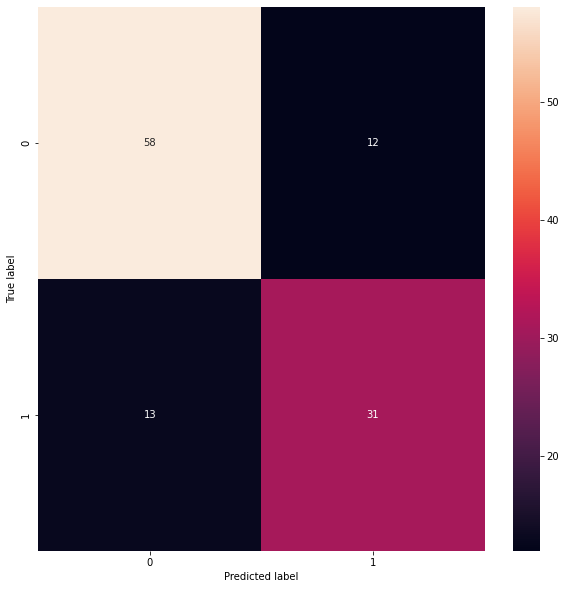

In [ ]:
#Now I am measuring the performance of the model by making a confusion matrix and presenting it

y_forest_pred = forest_classifier.predict(X_test)

#creating confusion matrix
cm_forest = confusion_matrix(y_test, y_forest_pred)

#visualizing confusion matrix
sns.heatmap(cm_forest, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
#Presenting the accuracy of the random forest model
print('Accuracy (forest): {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_forest_pred)))

Accuracy (forest): 0.78


Overall, my model does not overfit too much to the new dataset, so it's safe to conclude that it generalizes well.

## <font color='lightblue'>5. Interpret your model</font>

**Q5**: Interpret your model results. E.g., what features contributed to your predictions, if possible, can you determine the sign and magnitude of the effect (Marks: 2).

In [ ]:
#Calculating all of the importance of all variables contributing to whether a passenger survived or not

#use permutation importance
perm_result = permutation_importance(forest_classifier, X=X_test, y=y_test, scoring='accuracy', n_repeats=30)

#place values into a dataframe
forest_importances = pd.DataFrame({'variable':X_test.columns,'impo':perm_result.importances_mean.round(4), "sd":perm_result.importances_std.round(4)})

#sort the dataframe
forest_importances.sort_values(by='impo', ascending=False)

,variable,impo,sd
7,Sex_female,0.0708,0.0218
8,Sex_male,0.0436,0.0202
3,SibSp,0.0099,0.0044
4,Fare,0.0018,0.0177
1,Pclass,0.0012,0.0153
6,Class,0.0012,0.0153
2,Age,-0.0047,0.0197
0,PassengerId,-0.0064,0.0197
5,Age_wiki,-0.0070,0.0166


(array([-0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,
         0.07,  0.08]), <a list of 11 Text major ticklabel objects>)

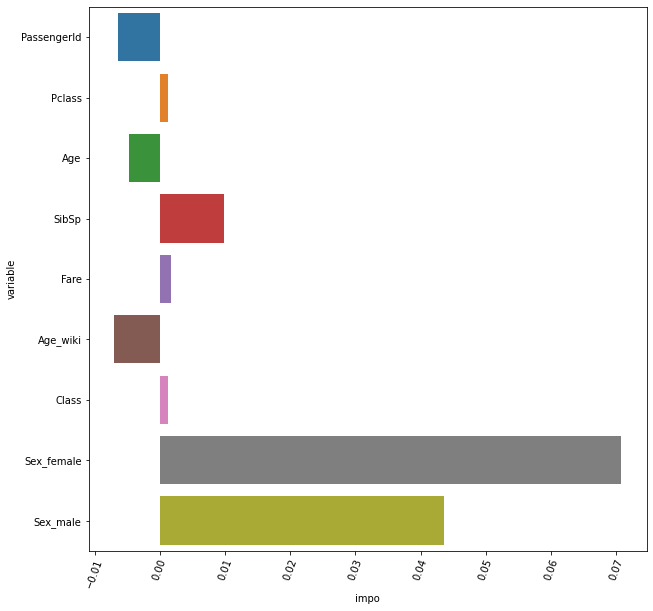

In [ ]:
#presenting the importance of all variables
plt.rcParams["figure.figsize"] = (10, 10)
sns.barplot(data=forest_importances, x='impo',y='variable')
plt.xticks(rotation=70)

Since I am using a random forest model to analyze my chosen dataset, the results presented in the bar graph above may not be as coherent as the explanation provided. From what I've seen after running multiple times is that gender is a huge factor, usually tends to be the biggest, with class type coming in second place. PassengerID, WikiID, Fare, and SibSP float around the ~0.01 mark, so they are not as big contributors as the other variables mentioned before.

## <font color='lightblue'>6. Answer your question</font>

**Q6:** Use your analysis above to answer your question of interest. Did you achieve your desired outcome, and what might the next steps be? Remember to write as though you are writing to team mates working on the same/similar problem. (Marks: 3)


Note: It is ok if your analysis doesn't provide a strong answer, you can point out where it failed. If anything you can cross the approach you took off the list of possible ways to tackle your question. I.e., you still made progress!

In conclusion, it's logical to conclude that gender, age, and class type factored into whether you survived the Titanic incident or not. In terms of my ideal outcome, I would say that I am satisfied with my results, since it answers my question. However, sometimes we see in different runs that these variables can significantly outweigh the other variables my a large margin. So if you're looking at this report at a quick glance, you might see Pclass or Class with a ~0.07 importance and, Sex_male and Sex_female with a low importance of ~0.01. Therefore, I reccomend multiple runs to understand which variables play a key role in answering my question of which passengers survived or not?